# Julia sofware for computing projections onto the generalized Minkowski set
Bas Peters (Emory University), Felix J. Herrmann (Georgia Institute of Technology)

## [Preprint paper](https://arxiv.org/abs/1903.03942) --  [Code on github merged with SetIntersectionProjection](https://github.com/slimgroup/SetIntersectionProjection.jl)

This is the documentation main page corresponding to the **Julia 1.5** software developed by Bas Peters and Felix J. Herrmann that computes projections of vectorized 2D and 3D images/models ($m \in \mathbb{R}^N$) onto a generalization of the Minkowski set:

\begin{equation}
\mathcal{M} \equiv \{ m = u + v \: | \: u \in \bigcap_{i=1}^p \mathcal{D}_i, \: v \in \bigcap_{j=1}^q \mathcal{E}_j, \: m \in \bigcap_{k=1}^r \mathcal{F}_k \},
\end{equation}
The vector $m$ is an element of the generalized Minkowski set if $m$ is an element of the intersection of $r$ sets $\mathcal{F}_k$ and also the sum of two
components $u \in \mathbb{R}^N$ and $v \in \mathbb{R}^N$. The vector $u$
is an element of the intersection of $p$ sets $\mathcal{D}_i$ and $v$ is an
element of the intersection of $q$ sets $\mathcal{E}_j$.

This is a set designed to descripe prior knowledge to regularize inverse problems using constraints. Each set describes prior knowledge on the model parameters itself, or, properties of one of the components. See below for examples of sets we can work with. 

An important feature of the algorithms and software, is their focus on problems where each set definition can also include a, possibly non-orthogonal, linear operator. The Euclidean projection onto the generalized Minkowski set may then be formulated using sums of indicator functions as
\begin{equation}
\min_{u,v,w} \frac{1}{2} \| w - m \|_2^2 + \sum_{i=1}^p \iota_{\mathcal{D}_i}(A_i u) + \sum_{j=1}^q \iota_{\mathcal{E}_j}(B_j v) + \sum_{k=1}^r \iota_{\mathcal{F}_k}(C_k w) + \iota_{w=u+v}(w,u,v),
\end{equation}
where $A_i$, $B_i$, and $C_i$ are different linear operators of each $i$, $j$, and $k$.

The generalized Minkowski set, algorithms, and software are designed
 
- for applications in imaging inverse problems.
- as a plug-in projector for other algorithms that solve
	$\min_m f(m) \:\: \text{s.t.} \:\: m \in \mathcal{M}$
	, e.g., a (spectral) projected gradient / projected quasi-Newton / projected-Newton method. 
- as a solver for linear inverse problem with a linear forward operator $F \in \mathbb{R}^{M \times N}$, data constraints such as $\mathcal{C}^\text{data} = \{ x \: | \: \| Fx - d_\text{observed} \|_2 \leq \sigma \}$, and model property constraints formulated as

\begin{equation}
	\min_{x} \frac{1}{2} \| x - m \|_2^2 \quad \text{s.t.} \quad x \in \mathcal{M} \bigcap \mathcal{C}^{\text{data}}
\end{equation}

## Applications

 - Generalized Minkowski decomposition of a video [script](https://github.com/slimgroup/SetIntersectionProjection.jl/blob/master/examples/GeneralizedMinkowski/Minkowski_video_decomposition.jl) / [notebook](https://github.com/slimgroup/SetIntersectionProjection.jl/blob/master/examples/GeneralizedMinkowski/example_2D_Minkowski_projection.ipynb)
 - Generalized Minkowski projection and decompositions of a geological model [script](https://github.com/slimgroup/SetIntersectionProjection.jl/blob/master/examples/GeneralizedMinkowski/example_2D_Minkowski_projection.jl) / [notebook](https://github.com/slimgroup/SetIntersectionProjection.jl/blob/master/examples/GeneralizedMinkowski/Minkowski_video_decomposition.ipynb)
 - Training a neural network for image segmentations using generalized minkowski constraints on the network output. Cameraman [script](https://github.com/slimgroup/SetIntersectionProjection.jl/blob/master/examples/GeneralizedMinkowski/ConstrainedNeuralNetworkSegmentation_cameraman.jl)/[notebook](https://github.com/slimgroup/SetIntersectionProjection.jl/blob/master/examples/GeneralizedMinkowski/ConstrainedNeuralNetworkSegmentation_cameraman.ipynb) , zebra [script](https://github.com/slimgroup/SetIntersectionProjection.jl/blob/master/examples/GeneralizedMinkowski/ConstrainedNeuralNetworkSegmentation_zebra.jl) / [notebook](https://github.com/slimgroup/SetIntersectionProjection.jl/blob/master/examples/GeneralizedMinkowski/ConstrainedNeuralNetworkSegmentation_zebra.ipynb)
 - [Seismic full-waveform inversion with generalized Minkowski constraints (coming soon)]
 
## Computational features

- this package is based on the [SetIntersecionProjection](https://petersbas.github.io/SetIntersectionProjectionDocs/) package that was designed to compute projections onto intersections of sets. Not all SetIntersecionProjection features are available for generalized Minkowski sets at the moment.
- parametric typing for Float32 and Float64 support
- designed for small 2D up to larger 3D models/grids
- includes scripts to set up projectors and linear operators for 2D and 3D models
- constraints may be defined for the matrix/tensor model and for columns/slices/fibers simultaneously
- linear operators may be: SparseMatrixCSC or [JOLI](https://github.com/slimgroup/JOLI.jl) DCT/DFT/Curvelet matrix-free operators. Software internally converts sparse matrices to compressed diagonal (CDS) format for MVPs where appropriate.

## List of constraints & linear operators

Overview of constraint sets that the software currently supports. A new constraint set may be added by providing a projection onto the set (without linear operator) and a sparse linear operator or equivalent matrix-vector product together with its adjoint.


|  descriptions | mathematical form of the constrain set construction |
|-------- |-------- | 
| $\{ m \: \mid \: l \leq m \leq u \}$   | bounds |
| transform-domain bounds | $\{ m \: \mid \: l \leq (A m)[i] \leq u \}$ |
| transform-domain $\ell_1$ | $\{ m \: \mid \: \| A m \|_1 \leq \sigma \}$ |
| transform-domain $\ell_2$ | $\{ m \: \mid \: \| A m \|_2 \leq \sigma \}$ |
| transform-domain annulus | $\{ m \: \mid \: \sigma_l \leq \| A m \|_2 \leq \sigma_u \}$ |
| transform-domain cardinality | $\{ m \: \mid \: \text{card}(Am) \leq k \}$, $k$ is a positive integer |
| transform-domain nuclear norm | $\{ m \: \mid \: \sum_{j=1}^k \lambda[j] \leq \sigma \}$, with $Am = \operatorname{vec}( \sum_{j=1}^{k}\lambda[j] u_j v_j^\top )$ is the SVD |
| transform-domain rank constraint | $\{ m \: \mid \:  Am = \operatorname{vec}( \sum_{j=1}^{r}\lambda[j] u_j v_j^\top) \}$, $r < \text{min}(n_z,n_x)$ |
| subspace constraints | $\{ m \: \mid m = A c, \:\: c \in \mathbb{C}^M \}$ |


Overview of the linear operators that we currently set up. Software can work with any linear operator as long it is one of the types `SparseMatrixCSC` or `JOLI` operator. Possible conversion to CDS format happens in the software. Operator math is shown for the 2D case. Curvelets require the separate installation of the [CurveLab](http://curvelet.org/software.html) software.

|  descriptions | Linear operator | code
|--- |--- | --- |
|discrete derivative in one direction | $D_z \otimes I_x$ , $I_z \otimes D_x$ | "D_z", "D_x", "D_y" |
|discrete derivative in all directions | $\begin{pmatrix} D_z \otimes I_x \\ I_z \otimes D_x \end{pmatrix}$ | "D2D" or "D3D" | 
| identity matrix | $I$ | "identity" |
| discrete cosine transform | | "DCT" |
| discrete Fourier transform | | "DFT" |
| curvelet transform | | "curvelet" |
| wavelet transform | | "wavelet" |

# A first example
Because the software is based on [SetIntersectionProjection.jl](https://github.com/slimgroup/SetIntersectionProjection.jl), it may be useful to have a look at the [documentation](https://petersbas.github.io/SetIntersectionProjectionDocs/) for that package. This example is pretty self-contained however so we hope it explains some things by itself. Note that this is for Julia 1.5

In [26]:
using SetIntersectionProjection
using MAT
using LinearAlgebra

mutable struct compgrid
  d :: Tuple
  n :: Tuple
end

#PARSDMM options:
options    = PARSDMM_options()
options.FL = Float32

#select working precision
if options.FL==Float64
  TF = Float64
elseif options.FL==Float32
  TF = Float32
end

#load image to project
file = matopen(joinpath(dirname(pathof(SetIntersectionProjection)), "../examples/Data/compass_velocity.mat"))
m    = read(file, "Data");close(file)
m    = m[1:341,200:600]
m    = permutedims(m,[2,1])

#set up computational grid (25 and 6 m are the original distances between grid points)
comp_grid = compgrid((TF(25.0), TF(6.0)),(size(m,1), size(m,2)))
m         = convert(Vector{TF},vec(m));

Now we are ready to define multiple constraints for the model, as well as for each of the two components in the Generalized Minkowsi set.

First we define constraints for the model parameters itself (the sum of the two components).

In [27]:
#constraints for total model
constraint_sum = Vector{SetIntersectionProjection.set_definitions}()

#bounds:
m_min     = 1500.0
m_max     = 4500.0
set_type  = "bounds"
TD_OP     = "identity"
app_mode  = ("matrix","")
custom_TD_OP = ([],false)
push!(constraint_sum, set_definitions(set_type,TD_OP,m_min,m_max,app_mode,custom_TD_OP));

Second, we define constraints for component 1. We use bound constraints and monotonically increasing parameter values in the vertical direction.

In [28]:
#constraints for component 1 of the model
constraint_c1 = Vector{SetIntersectionProjection.set_definitions}()

#bounds component 1:
m_min     = 1500f0*ones(TF,prod(comp_grid.n))
m_max     = 4500f0.*ones(TF,comp_grid.n)
m_max[:,1:35] .= 1500f0
m_max     = vec(m_max)
set_type  = "bounds"
TD_OP     = "identity"
app_mode  = ("matrix","")
custom_TD_OP = ([],false)
push!(constraint_c1, set_definitions(set_type,TD_OP,m_min,m_max,app_mode,custom_TD_OP))

#slope constraints component 1(vertical)
m_min     = 0.0
m_max     = 1e6
set_type  = "bounds"
TD_OP     = "D_z"
app_mode  = ("matrix","")
custom_TD_OP = ([],false)
push!(constraint_c1, set_definitions(set_type,TD_OP,m_min,m_max,app_mode,custom_TD_OP));

Now we define the constraints for the second component. We use bounds and low-rank constraints.

In [29]:
#constraints for component 2 of the model
constraint_c2 = Vector{SetIntersectionProjection.set_definitions}()

#bounds component 2:
m_min     = -500.0
m_max     = 500.0
set_type  = "bounds"
TD_OP     = "identity"
app_mode  = ("matrix","")
custom_TD_OP = ([],false)
push!(constraint_c2, set_definitions(set_type,TD_OP,m_min,m_max,app_mode,custom_TD_OP))

#rank constraint component 2
m_min     = 0
m_max     = 20
set_type  = "rank"
TD_OP     = "identity"
app_mode  = ("matrix","")
custom_TD_OP = ([],false)
push!(constraint_c2, set_definitions(set_type,TD_OP,m_min,m_max,app_mode,custom_TD_OP));

So far, we defined what constraints we would like to use. The next step is to use the provide scripts to generate constraint set information, projectors, and linear operators.

In [30]:
(P_sub_sum,TD_OP_sum,set_Prop_sum) = setup_constraints(constraint_sum,comp_grid,options.FL)
(P_sub_c1,TD_OP_c1,set_Prop_c1) = setup_constraints(constraint_c1,comp_grid,options.FL)
(P_sub_c2,TD_OP_c2,set_Prop_c2) = setup_constraints(constraint_c2,comp_grid,options.FL);

Now we have projectors onto simple sets and linear operators, for each component and the sum separately. We'll run a script to unify and generate input for the PARSDMM algorithm. The code block below also precomputes certain quantities and distributes things over julia workers if we were to use it in parallel mode

In [31]:
options.Minkowski        = true #do not forget to set this flag to true!
(TD_OP,set_Prop,AtA,l,y) = PARSDMM_precompute_distribute_Minkowski(TD_OP_c1,TD_OP_c2,TD_OP_sum,set_Prop_c1,set_Prop_c2,set_Prop_sum,comp_grid,options);

We now put all our function calls to projectors in one vector.

In [32]:
P_sub = deepcopy(P_sub_c1);
append!(P_sub,P_sub_c2)
append!(P_sub,P_sub_sum);

We are ready to solve the projection problem onto the generalized Minkowski sum.

In [ ]:
@time (x,log_PARSDMM) = PARSDMM(m,AtA,TD_OP,set_Prop,P_sub,comp_grid,options);
@time (x,log_PARSDMM) = PARSDMM(m,AtA,TD_OP,set_Prop,P_sub,comp_grid,options);

Let's plot the results (this example uses PyPlot)

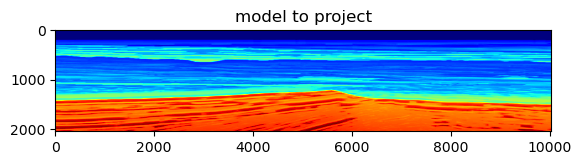

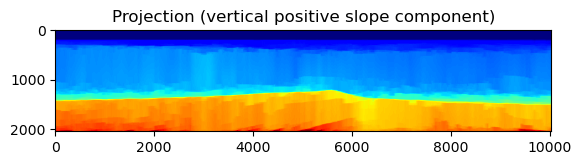

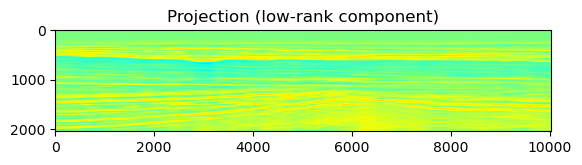

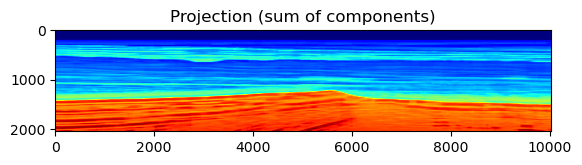

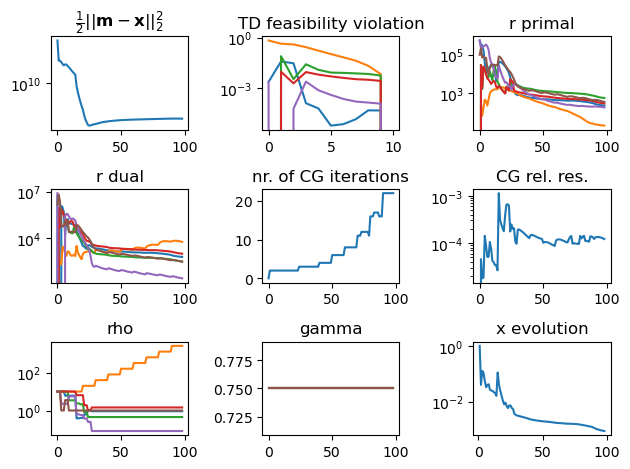

In [34]:
using PyPlot

m1 = x[1:length(m)]     #component 1
m2 = x[1+length(m):end] #component 2
ms = m1+m2;             #sum of components

#define axis limits and colorbar limits
xmax = comp_grid.d[1]*comp_grid.n[1]
zmax = comp_grid.d[2]*comp_grid.n[2]
vmi  = 1500
vma  = 4500

figure();imshow(permutedims(reshape(m,(comp_grid.n[1],comp_grid.n[2])),[2,1]),cmap="jet",vmin=vmi,vmax=vma,extent=[0,  xmax, zmax, 0]); title("model to project")
#savefig("original_model.png",bbox_inches="tight")
figure();imshow(permutedims(reshape(m1,(comp_grid.n[1],comp_grid.n[2])),[2,1]),cmap="jet",vmin=vmi,vmax=vma,extent=[0,  xmax, zmax, 0]); title("Projection (vertical positive slope component)")
#savefig("projected_model_component1.png",bbox_inches="tight")
figure();imshow(permutedims(reshape(m2,(comp_grid.n[1],comp_grid.n[2])),[2,1]),cmap="jet",vmin=-1500,vmax=1500,extent=[0,  xmax, zmax, 0]); title("Projection (low-rank component)")
#savefig("projected_model_component2.png",bbox_inches="tight")
figure();imshow(permutedims(reshape(ms,(comp_grid.n[1],comp_grid.n[2])),[2,1]),cmap="jet",vmin=vmi,vmax=vma,extent=[0,  xmax, zmax, 0]); title("Projection (sum of components)")
#savefig("projected_model_sum_components.png",bbox_inches="tight")

figure();
subplot(3, 3, 3);semilogy(log_PARSDMM.r_pri)          ;title("r primal")
subplot(3, 3, 4);semilogy(log_PARSDMM.r_dual)         ;title("r dual")
subplot(3, 3, 1);semilogy(log_PARSDMM.obj)            ;title(L"$ \frac{1}{2} || \mathbf{m}-\mathbf{x} ||_2^2 $")
subplot(3, 3, 2);semilogy(log_PARSDMM.set_feasibility);title("TD feasibility violation")
subplot(3, 3, 5);plot(log_PARSDMM.cg_it)              ;title("nr. of CG iterations")
subplot(3, 3, 6);semilogy(log_PARSDMM.cg_relres)      ;title("CG rel. res.")
subplot(3, 3, 7);semilogy(log_PARSDMM.rho)            ;title("rho")
subplot(3, 3, 8);plot(log_PARSDMM.gamma)              ;title("gamma")
subplot(3, 3, 9);semilogy(log_PARSDMM.evol_x)         ;title("x evolution")
tight_layout()
#tight_layout(pad=0.0, w_pad=0.0, h_pad=1.0)
#savefig("PARSDMM_logs.png",bbox_inches="tight")


#A model, its projection onto the generaliez Minkowski set, as well as various diagnostics from the PARSDMM algorithm.